In [38]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sympy import *
from IPython import display

### EXAMPLE 2.1
A stirred-tank blending process with a constant liquid holdup of 2 $m^3$ is used to blend two streams whose densities are both approximately 900 $kg/m^3$. The density does not change during mixing.

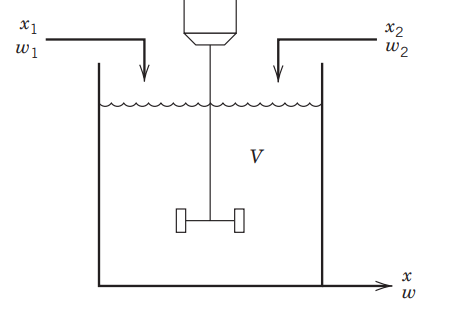

**(a)** Assume that the process has been operating for a long period of time with flow rates of $w_1$ = 500 kg/min and
$w_2$ = 200 kg/min, and feed compositions (mass fractions) of $x_1$ = 0.4 and $x_2$ = 0.75. What is the steady-state value of x?

In [39]:
w1=500 # 500kg/min
w2=200 # kg/min
x1=0.4
x2=0.75
# since the process is assumed to be at steady state then
w=w1+w2

# since wx=w1*x1+w2*x2
x=(w1*x1+w2*x2)/w
print("x = ",x)

x =  0.5


**(b)** Suppose that $w_1$ changes suddenly from 500 to 400 kg/min and remains at the new value. Determine an expression for x(t) and plot it.

In [40]:
# if we want to know the new steady state after the change we can repeate the same calculation in (a) but
# using different value for w1
w1=400 # kg/min
w=w1+w2
x=(w1*x1+w2*x2)/w
print("The new steady state will be at x = ",x)

The new steady state will be at x =  0.5166666666666667


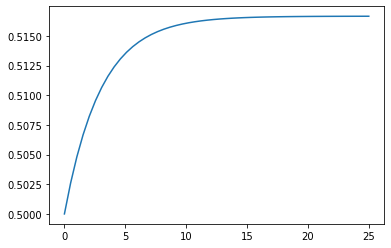

In [41]:
# However, the question is asking us to plot how x reached to the new steady-state over time?
# So, we have to use the differential equations that model the tank:

# d(rho*V)/dt=w1+w2-w
# d(rho*V*x)/dt=w1*x1+w2*x2-w*x

# since both rho (density) and volume is assume to be constants then the steady state for the
# mass balance still holds:
w1=400
w2=200
x1=0.4
x2=0.75
w=w1+w2

# for the composition equation:
# V*rho*(dx/dt) + wx = w1*x1+w2*x2  dividing by w we get:
# tau*(dx/dt) + x = m   where tau=(V*rho)/w and m=(w1*x1+w2*x2)/w
V = 2 # m3
rho=900 # kg/m3
tau=V*rho/w
m=(w1*x1+w2*x2)/w

# solving the differential equation manually using the following intial condition
# x(0)=0.5 we get the following equation that describe the dynamics process of the tank
x0=0.5

def f(t):
    return (x0-m)*np.exp(-t/tau)+m
t=np.linspace(0,25)
x=f(t)
plt.plot(t,x)
plt.show()

C:\Users\al7ak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\al7ak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\al7ak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was d

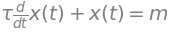

In [43]:
# using sympy module to find the analytic solution for the ODE

init_printing()
tau,m, t = symbols('tau m t')
x = Function('x')
ode = Eq(tau*diff(x(t), t)+x(t), m)
ode

In [45]:
sol = dsolve(ode, x(t))
sol

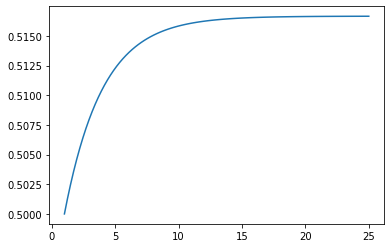

In [28]:
# using scipy.integrate to numerically solve the ODE for part b of the question

from scipy.integrate import odeint
V=2 # m3
rho= 900 #kg/m3
w1=400 # kg/min
w2=200 # kg/min
x1=0.4
x2=0.75
w=w1+w2
def model(x,t):
    tau=V*rho/w
    m=(w1*x1+w2*x2)/w
    return (m-x)/tau
t=np.linspace(1,25,100)
x0=0.5
x=odeint(model,x0,t)
plt.plot(t,x)
plt.show()

**(c)** Repeat part **(b)** for the case where $w_2$ (instead of $w_1$) changes suddenly from 200 to 100 kg/min and remains
there.

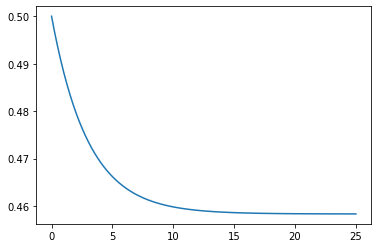

In [31]:
w1=500
w2=100
x1=0.4
x2=0.75
w=w1+w2
tau=V*rho/w
m=(w1*x1+w2*x2)/w
t=np.linspace(0,25,100)
x=f(t)
plt.plot(t,x)
plt.show()

**(d)** Repeat part **(c)** for the case where $x_1$ suddenly changes
from 0.4 to 0.6 (in addition to the change in $w_2$).

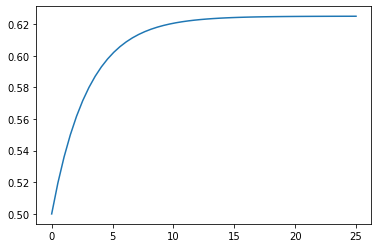

In [9]:
w1=500
w2=100
x1=0.6
x2=0.75
w=w1+w2
tau=V*rho/w
m=(w1*x1+w2*x2)/w
t=np.linspace(0,25)
x=f(t)
plt.plot(t,x)
plt.show()

**(e)** For parts **(b)** through **(d)**, plot the normalized response $x_N(t)$,
$$x_N(t) = \frac{x(t) − x(0)}{
x(∞) − x(0)}$$


The individual responses have the same normalized response:
$$\frac{x(t) − x(0)}{x(∞) − x(0)} = 1 − e^{−\frac{t}{\tau}}$$

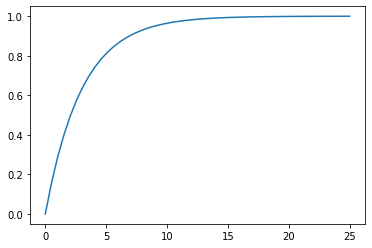

In [10]:
def normal_response(t):
    return 1-np.exp(-t/tau)
xn=normal_response(t)
plt.plot(t,xn)    
plt.show()

In [32]:
fig,ax=plt.subplots()
ax.set_xlim(0,25)
ax.set_ylim(0.4,.6)
curve,=ax.plot(t[0],x0)
t_data=[]
x_data=[]
def animation_frame(i):
    t_data.append(t[i])
    x_data.append(f(t[i]))
    curve.set_data((t_data,x_data))

animation=FuncAnimation(fig,func=animation_frame,frames=100,interval=200)
video=animation.to_html5_video()
html=display.HTML(video)
display.display(html)
plt.close()

In [ ]:
pip install ffmpeg-python